In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
ex1data1 = np.loadtxt("../../models/ex1data1.txt", delimiter=',')

In [3]:
def plot_data(x, y, title='Scatter plot of the training sample'):
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.plot(x, y, 'x', color='red')
    ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s',
           title=title)
    ax.grid()

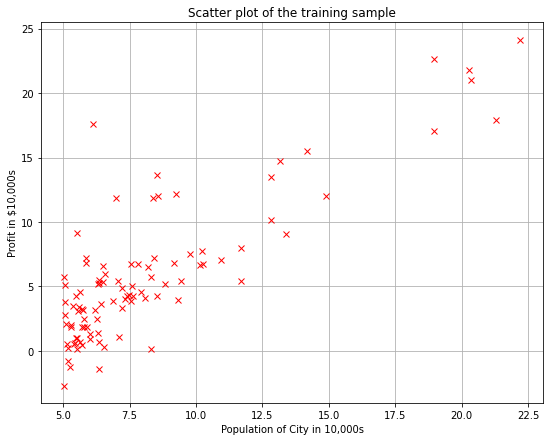

In [4]:
m = ex1data1.shape[0]
x, y = ex1data1[:, 0], ex1data1[:, 1]
plot_data(x, y)

In [5]:
x = np.hstack((np.ones((m, 1)), x.reshape((m, 1))))
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01

In [6]:
def compute_cost(x, y, theta):
    m = y.size
    l = x @ theta - y.reshape((m, 1))
    return (l.T @ l / 2 / m).item()


j = compute_cost(x, y, theta)
print("With theta", theta.reshape((2,)), "computed value is", j)
print("Expected cost value (approx) 32.07")

j = compute_cost(x, y, np.array([-1, 2]).reshape((2, 1)))
print("With theta", "[-1, 2]", "computed value is", j)
print("Expected cost value (approx) 54.24")

With theta [0. 0.] computed value is 32.072733877455676
Expected cost value (approx) 32.07
With theta [-1, 2] computed value is 54.24245508201238
Expected cost value (approx) 54.24


Theta found by gradient descent:
-3.6303	1.1664
Expected theta values (approx)
-3.6303	1.1664
For population = 35,000, we predict a profit of 4519.767867701768
For population = 70,000, we predict a profit of 45342.45012944714


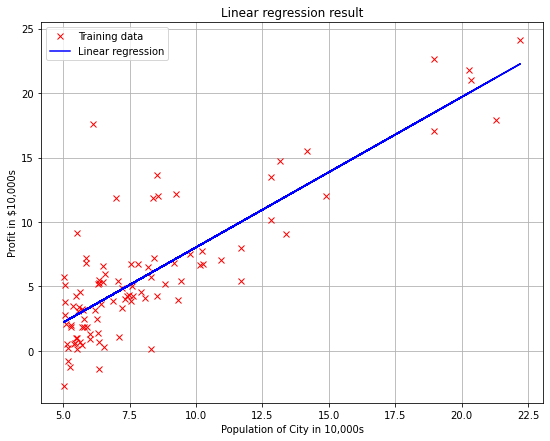

In [7]:
def gradient_descent(x, y, theta, alpha, num_iters):
    m = y.size
    j_history = list()
    for _ in range(num_iters):
        l = x @ theta - y.reshape((m, 1))
        k = x.T @ l
        theta = theta - alpha / m * k
        j_history.append(compute_cost(x, y, theta))
    return theta, j_history


theta, j_history = gradient_descent(x, y, theta, alpha, iterations)
print('Theta found by gradient descent:')
print('\t'.join(map(lambda n: str(round(n, 4)), theta.flatten())))
print('Expected theta values (approx)')
print('-3.6303\t1.1664')

fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(x[:, 1], y, 'x', color='red', label='Training data')
ax.plot(x[:, 1], x @ theta, color='blue', label='Linear regression')
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s',
       title='Linear regression result')
ax.grid()
ax.legend()

print(
    'For population = 35,000, we predict a profit of',
    (np.array([[1, 3.5]]) @ theta)[0, 0] * 10000
)

print(
    'For population = 70,000, we predict a profit of',
    (np.array([[1, 7]]) @ theta)[0, 0] * 10000
)

Text(0.5, 1.0, 'Contour, showing minimum')

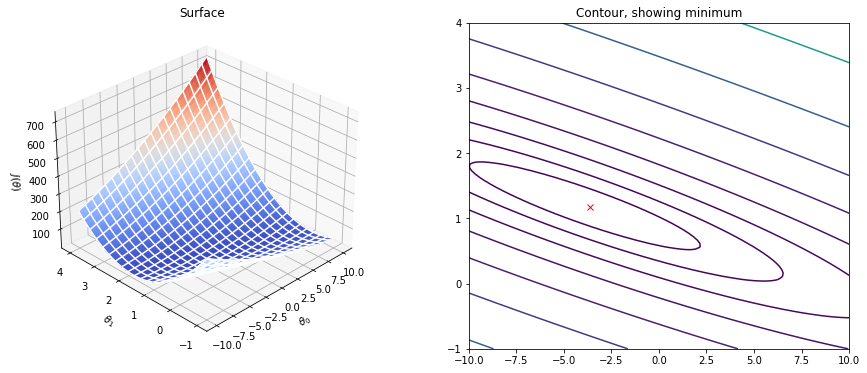

In [8]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
t0, t1 = np.meshgrid(theta0_vals, theta1_vals)
z = np.array([[compute_cost(x, y, np.array([[t0, t1]]).T) for t1 in theta1_vals] for t0 in theta0_vals]).T

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot_surface(t0, t1, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1.plot_wireframe(t0, t1, z, rstride=5, cstride=5, color='white')
ax1.set_xlabel('$\\theta_0$')
ax1.set_ylabel('$\\theta_1$')
ax1.set_zlabel('$J(\\theta)$')
ax1.view_init(30, -135)
ax1.set_title('Surface')

ax2.contour(t0, t1, z, levels=np.logspace(-2, 3, 20))
ax2.plot(theta[0, 0], theta[1, 0], 'x', color='red')
ax2.set_title('Contour, showing minimum')